In [1]:
import numpy as np
import pandas as pd

In [6]:
datac = pd.read_csv("C:\\bike_share.csv")
datac

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


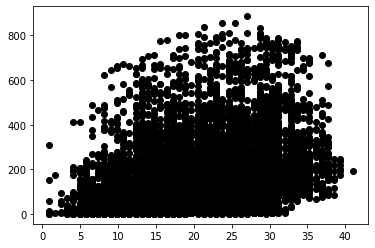

In [7]:
import matplotlib.pyplot as plt
plt.scatter(datac["temp"],datac["registered"], color='black')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(datac[['temp']],datac['registered'])

LinearRegression()

In [14]:
model.coef_

array([6.175466])

In [15]:
model.intercept_

30.617190185186118

In [17]:
bikemodel = lambda x: 6.175466*x + 30.617190185186118
temp = 10.5
bikemodel(temp)

95.45958318518612

In [18]:
model.predict(datac[["temp"]])

array([ 91.3837756 ,  86.31989348,  86.31989348, ..., 116.70318619,
       116.70318619, 111.63930408])

In [20]:
mp = model.predict(datac[["temp"]])
actual = datac["registered"]
datac["registered"]

0         13
1         32
2         27
3         10
4          1
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
mean_squared_error(actual,mp)

20495.689943766178

In [23]:
mean_absolute_error(actual,mp)

105.7257425543564

In [24]:
np.sqrt(mean_squared_error(actual,mp))

143.16315847230453

In [25]:
r2_score(actual,mp)

0.10148766065580495

In [26]:
def mean_absolute_percentage_error(actual,mp):
    actual, mp = np.array(actual), np.array(mp)
    return np.mean(np.abs((actual - mp)) / actual) * 100

In [28]:
mean_absolute_percentage_error(actual,mp)

<ipython-input-26-c61f6de05ec7>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - mp)) / actual) * 100


inf

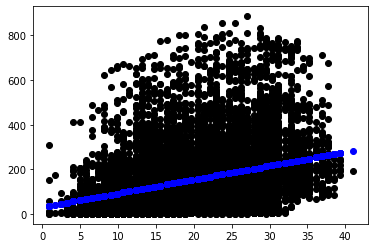

In [30]:
plt.scatter(datac["temp"],datac["registered"], color='black')
plt.scatter(datac["temp"],mp, color='b')
plt.show()